In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install kiwipiepy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd

C:\Users\cmhcm\AppData\Local\Temp\ipykernel_15848\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 14781개 뉴스 데이터 가져오기
- 풀본문 있는 데이터 입니다.

In [6]:
data_path = "C:/dev/openAI/result_df_14761.csv"
df = pd.read_csv(data_path, dtype=str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_id       14761 non-null  object
 1   news_date     14761 non-null  object
 2   news_keyword  14761 non-null  object
 3   news_feature  14761 non-null  object
 4   news_url      14686 non-null  object
 5   news_content  14761 non-null  object
 6   img_url       13992 non-null  object
dtypes: object(7)
memory usage: 807.4+ KB


# 중복제거 로직
- 형태소 분석기: Okt
- 벡터화: CountVectorizer
- 중복 기준: news_content 컬럼 데이터

In [7]:
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

In [8]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

# 전처리 함수 정의
def tokenizer(raw, pos=["Noun", "Alpha", "Number"], stopword=[]):
    return [
        word for word, tag in okt.pos(
            raw,
            norm=True,
            stem=True
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

## 전처리 및 벡터화

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer(
    tokenizer=tokenizer,
    min_df=2
)

In [10]:
# 기사 본문에 나오는 단어의 빈도 계산
X = vectorize.fit_transform(df['news_content'])

c:\Users\cmhcm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
cos_sim = cosine_similarity(X)

# 코사인 유사도가 0.9 이상인 경우를 중복으로 판단
dup_idx = np.where(cos_sim > 0.9)

In [ ]:
# 중복 기사 인덱스와 제목 출력 및 중복 기사 제거
to_drop = []

for i in range(len(dup_idx[0])):
    if dup_idx[0][i] != dup_idx[1][i]:  # 자기 자신과의 유사도는 제외

        # 먼저 게시된 기사를 남기고 싶으므로 인덱스가 더 작은 행을 제거
        to_remove = min(dup_idx[0][i], dup_idx[1][i])
        # print("삭제되는 기사 제목: ", df.iloc[to_remove]['news_id'])
        # print()

        to_drop.append(to_remove)

# 중복 기사 제거
df = df.drop(to_drop)
# 인덱스 재설정
df = df.reset_index(drop=True)

### 4,353개의 중복기사 제거

In [ ]:
# 중복제거 확인
df.shape

(10429, 7)

# 전처리

### news_url: null일 경우 삭제

In [ ]:
# url컬럼이 null 값을 가진 행 삭제
# df = df.dropna(subset=['news_url'])

### news_content: 명사/알파벳/숫자 추출
- tokenizer 함수는 중복제거 단계에서 정의함
- news_content 컬럼은 OpneAI에서 사용하기 때문에 삭제하면 안됨

In [ ]:
preprocessed_text = df['news_content'].apply(lambda x: ' '.join(tokenizer(x)))
df['summery_content'] = preprocessed_text

### 불용어 정의 및 제거

In [ ]:
# 먼저 두 컬럼을 각각 리스트로 변환합니다.
news_feature_list = df['news_feature'].str.split(',').tolist()
news_keyword_list = df['news_keyword'].str.split(',').tolist()

# 두 리스트를 합칩니다.
total_list = news_feature_list + news_keyword_list

# 리스트의 리스트를 하나의 리스트로 변환합니다.
flat_list = [item for sublist in total_list for item in sublist]

# 리스트를 문자열로 변환하고, 각 단어 사이에 ','를 넣습니다.
wordbook = ','.join(flat_list)

In [ ]:
import collections

# 문자열을 다시 리스트로 변환합니다.
wordbook_list = wordbook.split(',')

# 가장 많이 등장하는 단어를 찾습니다.
word_counts = collections.Counter(wordbook_list)

# 가장 빈번하게 등장하는 단어 상위 20개를 출력합니다.
for word, count in word_counts.most_common(20):
    print(word, ": ", count)


브랜드 :  23783
팝업스토어 :  21292
팝업 :  19880
스토어 :  16792
서울 :  13103
진행 :  12552
운영 :  11294
제품 :  11110
판매 :  9903
상품 :  9896
매장 :  9815
고객 :  8898
행사 :  8842
공간 :  8391
제공 :  7300
대표 :  7169
오픈 :  6657
인기 :  6652
구매 :  6650
시장 :  6274


In [ ]:
stopwords = ['브랜드', '팝업스토어', '팝업', '스토어', '서울', '진행', '운영', '제품', '판매', '상품', 
            '매장', '고객', '행사', '공간', '제공', '대표', '오픈', '인기', '구매', '시장', '오프라인', 
            '온라인', '매출', '관계자', '소비자', '한국', '출시', '백화점', '론칭']


In [ ]:
def remove_stopwords(text, stopwords):
    words = text.split(',')
    filtered_words = [word for word in words if word not in stopwords]
    return ','.join(filtered_words)

df['news_feature'] = df['news_feature'].apply(lambda x: remove_stopwords(x, stopwords))
df['news_keyword'] = df['news_keyword'].apply(lambda x: remove_stopwords(x, stopwords))


### news_feature와 news_keyword: 고유명사 추출 후 제거
- 추출한 고유명사는 'NNP' 컬럼에 저장

In [ ]:
# "kiwi"를 사용해서 형태소 분석
from itertools import product
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [ ]:
# 형태소 분석 및 고유명사 추출 함수 정의
def analyze_and_extract_NNP(text):
    result = kiwi.analyze(text)
    NNP_words = [word for word, tag, _, _ in result[0][0] if tag == 'NNP']
    return NNP_words

In [ ]:
# 쉼표 제거 후 형태소 분석 및 저장
df['news_feature'] = df['news_feature'].str.replace(',', ' ')  # 쉼표 제거
df['news_keyword'] = df['news_keyword'].str.replace(',', ' ')  # 쉼표 제거

In [ ]:
# news_feature와 news_keyword 열에 대해 고유명사 추출
df['NNP'] = df['news_feature'].apply(analyze_and_extract_NNP)
df['NNP'] = df['NNP'] + df['news_keyword'].apply(analyze_and_extract_NNP)

In [ ]:
# 'news_feature' 열 데이터와 'NNP' 열 데이터 비교하여 겹칠 경우 삭제
for index, row in df.iterrows():
    nnp_list = row['NNP']
    news_feature = row['news_feature']
    cleaned_news_feature = ' '.join(word for word in news_feature.split() if word not in nnp_list)
    df.at[index, 'news_feature_cleaned'] = cleaned_news_feature

In [ ]:
# 'news_keyword' 열 데이터와 'NNP' 열 데이터 비교하여 겹칠 경우 삭제
for index, row in df.iterrows():
    nnp_list = row['NNP']
    news_keyword = row['news_keyword']
    cleaned_news_keyword = ' '.join(word for word in news_keyword.split() if word not in nnp_list)
    df.at[index, 'news_keyword_cleaned'] = cleaned_news_keyword

# 군집화: K-means
### FastText 이용하여 벡터화

In [ ]:
from gensim.models.fasttext import load_facebook_model

# FastText 모델 로드
ko_model = load_facebook_model("C:/Users/cmhcm/OneDrive/바탕 화면/cc.ko.300.bin")

In [ ]:
# 데이터 프레임에서 텍스트 데이터를 가져옵니다.
feature_word = df['news_feature_cleaned'].values
keywords_word = df['news_keyword_cleaned'].values
content_word = df['summery_content'].values


# 세 단어장을 결합합니다.
combined_data = np.concatenate((feature_word, keywords_word, content_word))

In [ ]:
# 텍스트를 단어 리스트로 변환하되, 중복되는 단어는 제거합니다.
word_lists = [list(set(text.split())) for text in combined_data]

# FastText 모델에 데이터를 추가 학습시킵니다.
ko_model.build_vocab(word_lists, update=True)
ko_model.train(word_lists, total_examples=len(word_lists), epochs=ko_model.epochs)

(1046756, 2560017)

In [ ]:
# FastText 벡터화를 수행합니다.
vectors = []
for text in feature_word:
    words = [word for word in text.split() if word in ko_model.wv]
    if words:
        vector = np.mean([ko_model.wv[word] for word in words], axis=0)
    else:
        vector = np.zeros(ko_model.vector_size)  # 모델의 벡터 크기에 맞는 제로 벡터를 사용
    vectors.append(vector)

vectors = np.array(vectors)  # 벡터 리스트를 numpy array로 변환
vectors_clustering = vectors.copy()


In [ ]:
from sklearn.cluster import KMeans

# 데이터프레임의 행의 수를 가져오는 코드 예시
n = len(df)  # df는 데이터프레임 변수명에 맞게 수정해야 합니다.

k = 5
# KMeans 모델 정의
kmeans = KMeans(n_clusters=k, random_state=0)

# FastText 값에 KMeans 모델 적용
kmeans.fit(vectors_clustering)

# 군집 결과를 '군집' 컬럼에 저장
df['군집'] = kmeans.labels_

In [ ]:
df['군집'].value_counts()

군집
3    3017
0    3005
1    1975
2    1566
4     866
Name: count, dtype: int64

## 군집 시각화
- 전체 중 절반만 샘플링하여 시각화
- 전체 데이터 시각화 시 런타임 끊길 수 있음

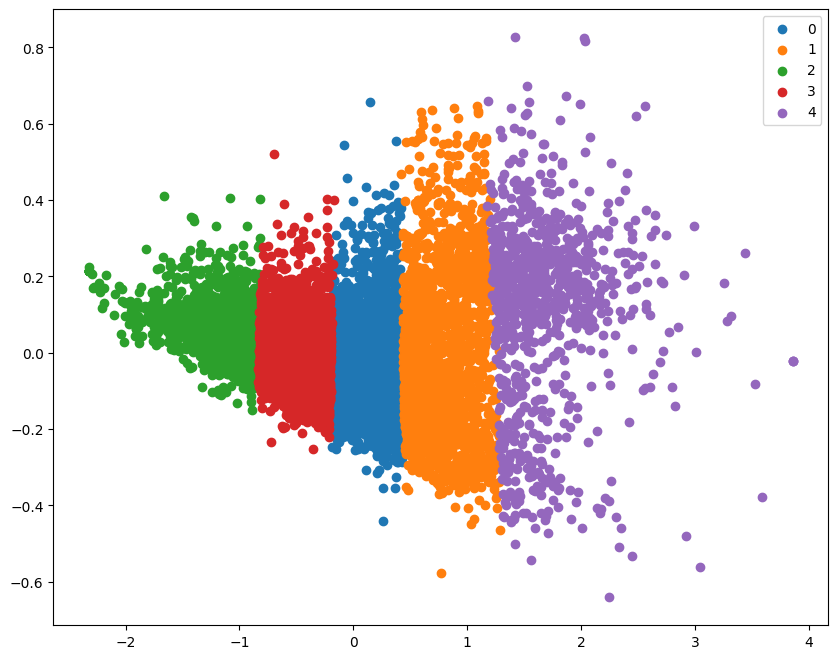

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# vectors가 리스트가 아니라면 리스트로 변환
if not isinstance(vectors_clustering, list):
    vectors_clustering = list(vectors_clustering)


# 벡터의 절반을 샘플링
sample_vectors_clustering = random.sample(vectors_clustering, len(vectors_clustering) // 2)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors_clustering)

# PCA 결과를 데이터프레임에 추가
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 각 군집을 다른 색상으로 표시하여 시각화
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(df[df['군집'] == i]['PCA1'], df[df['군집'] == i]['PCA2'], label=i)
plt.legend()
plt.show()

### 군집 중심 분석

C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


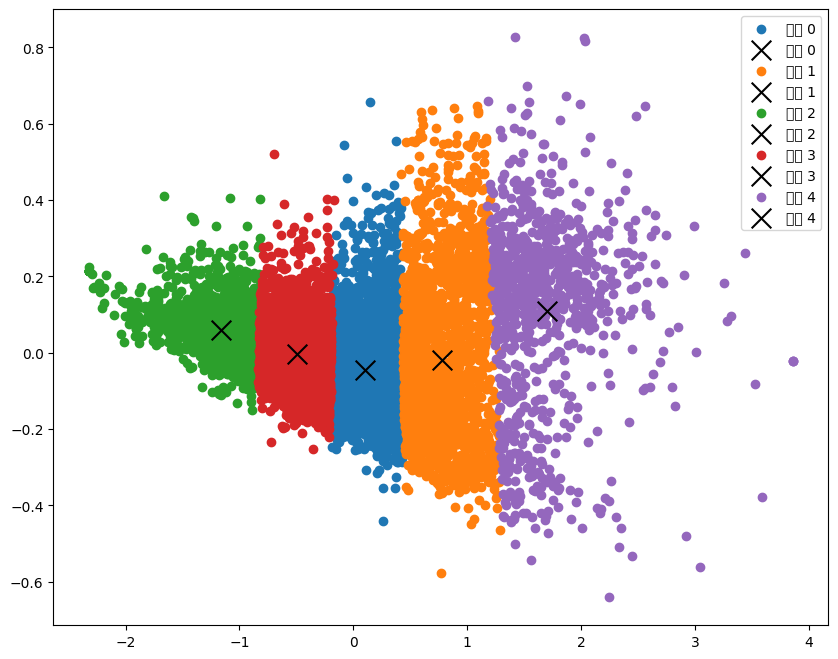

In [ ]:
# 각 군집의 중심을 계산
centroids = df.groupby('군집')[['PCA1', 'PCA2']].mean()

# 시각화
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(df[df['군집'] == i]['PCA1'], df[df['군집'] == i]['PCA2'], label='군집 '+str(i))
    plt.scatter(centroids.loc[i, 'PCA1'], centroids.loc[i, 'PCA2'], label='중심 '+str(i), marker='x', s=200, c='black')  
plt.legend()
plt.show()


In [ ]:
# 각 데이터의 군집 중심점까지의 거리를 계산
df['distance'] = df.apply(lambda row: np.linalg.norm(row[['PCA1', 'PCA2']] - centroids.loc[row['군집']]), axis=1)

# 각 군집에서 거리가 가장 짧은 데이터를 찾음
closest_points = df.loc[df.groupby('군집')['distance'].idxmin()]


In [ ]:
from scipy.spatial import distance

# 각 군집의 중심점에서 가장 가까운 200개의 데이터를 저장할 DataFrame을 준비합니다.
closest_points_to_centroids = pd.DataFrame()

for i in range(k):
    # 각 군집에 대해
    cluster_points = df[df['군집'] == i][['PCA1', 'PCA2']]
    centroid = centroids.loc[i]

    # 각 데이터 포인트에서 군집의 중심까지의 거리를 계산합니다.
    distances = cluster_points.apply(lambda x: distance.euclidean(x, centroid), axis=1)

    # 거리가 가장 작은 200개의 데이터를 선택합니다.
    closest_points = distances.nsmallest(200).index

    # 선택한 데이터를 DataFrame에 추가합니다.
    closest_points_to_centroids = pd.concat([closest_points_to_centroids, df.loc[closest_points]])


In [ ]:
import collections

with open('output.txt', 'w', encoding='utf-8') as f:
    for i in range(k):
        f.write(f"군집 {i}:\n")

        for column in ['news_keyword', 'news_feature']:
            f.write(f"{column}에서 가장 많이 등장하는 단어 상위 5개:\n")

            # 해당 군집에서 해당 컬럼의 데이터를 모두 합칩니다.
            text = ','.join(closest_points_to_centroids[closest_points_to_centroids['군집'] == i][column])

            # 문자열을 단어로 분리합니다.
            words = text.split()

            # 가장 많이 등장하는 단어를 찾습니다.
            word_counts = collections.Counter(words)

            # 가장 빈번하게 등장하는 단어 상위 5개를 출력합니다.
            for word, count in word_counts.most_common(5):
                f.write(f"{word} : {count}\n")
            f.write("\n")


# 코사인 유사도
- 다른 유사도 사용해봤지만 코사인 유사도 계산이 가장 좋았습니다.

In [ ]:
# 벡터들 사이의 코사인 유사도를 계산합니다.
cosine_similarities = cosine_similarity(vectors)

# 코사인 유사도를 출력합니다.
print(cosine_similarities)

[[1.         0.40928894 0.90585878 ... 0.90963995 0.90236216 0.86773856]
 [0.40928894 1.         0.38161712 ... 0.33036138 0.35914079 0.32635754]
 [0.90585878 0.38161712 1.         ... 0.95301716 0.94641283 0.89602721]
 ...
 [0.90963995 0.33036138 0.95301716 ... 1.         0.95757742 0.9132339 ]
 [0.90236216 0.35914079 0.94641283 ... 0.95757742 1.         0.91061247]
 [0.86773856 0.32635754 0.89602721 ... 0.9132339  0.91061247 1.        ]]


In [ ]:
# 각 행마다 유사도가 높은 상위 6개의 인덱스를 추출합니다.
top_6_indices = np.argsort(-cosine_similarities, axis=1)[:, :6]

# 첫 번째 항목 (즉, 자기 자신)을 제외합니다.
top_5_indices = top_6_indices[:, 1:]

# 해당 인덱스를 사용하여 news_id를 찾습니다.
top_5_news_IDs = df.loc[top_5_indices.flatten(), 'news_id'].values.reshape(-1, 5)

# 'Top_5'라는 새로운 컬럼에 news_ID를 저장합니다.
df['Top_5'] = top_5_news_IDs.tolist()


In [ ]:
# 자기 자신과의 유사도를 제외하고 각 행에서 가장 높은 유사도를 찾습니다.
np.fill_diagonal(cosine_similarities, -1)
best_similarities = np.max(cosine_similarities, axis=1)

# 'Best_similarities'라는 새로운 컬럼에 최대 유사도를 저장합니다.
df['best_similarities'] = best_similarities

In [ ]:
df.head(10)

,news_id,news_date,news_keyword,news_feature,news_url,news_content,img_url,summery_content,NNP,news_feature_cleaned,news_keyword_cleaned,군집,PCA1,PCA2,distance,Top_5,best_similarities
0,02100201.20240214165525001,2024-02-14,나혼산 규현 바퀜 주문폭주 소요 배송 순수 원조 진공 용기 신세계 CJ 메가 플랫폼...,바퀜 규현 메이커빌 나혼산 신세계백화점 메가플랫폼 온오프라인 신세계 밀폐용기 보관력...,http://news.moneytoday.co.kr/view/mtview.php?n...,2024-02-14머니투데이 이동오 기자 순수 국내기술로 개발한 원조 진공용기신세계...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 머니투데이 동오 기자 순수 국내 기술 개발 원조 진공 용기 신세...,"[바퀜, 규현, 메이커빌, 나혼산, 신세계백화점, 신세계, 아마존, 미국, 규현, ...",메가플랫폼 온오프라인 밀폐용기 보관력 프코크 cj,주문폭주 소요 배송 순수 원조 진공 용기 CJ 메가 플랫폼 협업 시너지 MBC 혼자...,2,-1.177593,-0.106924,0.166228,"[02100801.20230420084402002, 02100201.20230612...",0.949225
1,02100201.20240214161101001,2024-02-14,렌즈스토어 뷰티 렌즈 편집숍 윙크 울산 대구 뷰티 콘택트렌즈 플랫폼 윙크컴퍼니 확대...,윙크컴퍼니 뷰티렌즈 대구 울산 큐레이션 정문기 중구 남구 렌즈스토어,http://news.moneytoday.co.kr/view/mtview.php?n...,2024-02-14머니투데이 조한송 기자 뷰티 콘택트렌즈 플랫폼 윙크컴퍼니가 고객 ...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 머니투데이 기자 뷰티 콘택트렌즈 플랫폼 윙크 컴퍼니 고객 경험 ...,"[대구, 울산, 큐레이션, 중구, 남구, 울산, 대구, 울산광역시, 대구광역시, 뷰...",윙크컴퍼니 뷰티렌즈 정문기 렌즈스토어,렌즈스토어 렌즈 편집숍 윙크 콘택트렌즈 플랫폼 윙크컴퍼니 확대 경험 전략 채널 강화...,2,-2.274102,0.171205,1.116017,"[02100801.20230920081710001, 02100601.20200206...",0.604813
2,01500601.20240214160335001,2024-02-14,대표이사 대구불로탁주 최종국 이사 생물 도전장 지역 막걸리 글로벌 막걸리 생물 막걸...,대구 대구불로탁주 불로막걸리 품평회 생막걸리 양조장 대한민국 한국막걸리협회 동구 생...,https://www.imaeil.com/page/view/2024021314385...,2024-02-14막걸리는 살아있는 생물입니다. 지역 전통 막걸리의 맛을 전국을 넘...,https://www.bigkinds.or.kr/resources/images/01...,2024-02 14 막걸리 생물 지역 전통 막걸리 전국 세계 시장 계획 50 이상 ...,"[대구, 대구부, 대한민국, 한국, 일본, 대구부, 대구, 불로동, 대구, 안재모,...",대구불로탁주 불로막걸리 품평회 생막걸리 양조장 한국막걸리협회 생효모 경쟁력,대표이사 대구불로탁주 최종국 이사 생물 도전장 지역 막걸리 글로벌 막걸리 생물 막걸...,2,-0.954317,0.015421,0.213881,"[01400401.20200818140025001, 02100601.20220527...",0.979166
3,07100501.20240214144618001,2024-02-14,신세계 강남점 엄브로 단독 주년 선봬 신세계백화점 영국 스포츠 엄브로 주년 업계 단...,엄브로 강남점 영국 혼네 신세계백화점 주년 굿즈 엄브 일상복 선현우 신세계 선착순 ...,http://www.etnews.com/20240214000260,2024-02-14신세계백화점은 영국 스포츠 브랜드 엄브로 론칭 100주년을 맞아 ...,https://www.bigkinds.or.kr/resources/images/07...,2024-02 14 신세계 백화점 영국 스포츠 브랜드 엄브로 론칭 100 주년 업계...,"[엄브로, 영국, 혼네, 신세계백화점, 현우, 신세계, 신세계, 엄브로, 신세계백화...",강남점 주년 굿즈 일상복 선현우 선착순 런드리 20만 포토존 패션담당 스테이지 선봬,강남점 단독 주년 선봬 스포츠 주년 업계 단독 강남점 14일 시작 유행 MZ고객 스...,1,1.026644,-0.073347,0.253204,"[02100501.20240214103102002, 01600301.20231003...",0.991756
4,02100501.20240214103102002,2024-02-14,신세계 강남점 엄브로 단독 주년 신세계백화점 영국 스포츠 엄브로 주년 업계 단독 1...,영국 엄브로 엄브 신세계백화점 주년 강남점 신세계 축구팀 일상복 오랫동안 선현우 블...,http://www.fnnews.com/news/202402141025245334,2024-02-14파이낸셜뉴스 신세계백화점은 영국 스포츠 브랜드 엄브로의 론칭 10...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 파이낸셜뉴스 신세계 백화점 영국 스포츠 브랜드 엄브로 론칭 10...,"[영국, 엄브로, 엄브, 신세계백화점, 신세계, 현우, 맨체스터, 신세계, 엄브로,...",주년 강남점 축구팀 일상복 오랫동안 선현우 블록코어 매력적 믹스매치 팬들 굿즈 런드...,강남점 단독 주년 스포츠 주년 업계 단독 14일 세탁소 시작 선수 오랫동안 축구 팬...,0,0.415425,0.012600,0.322578,"[01100401.20240111172445001, 07100501.20231120...",0.993646
5,01100901.20240214080104001,2024-02-14,초콜릿 캐릭터 편의점 밸런타인 전쟁 비크닉 빼빼로데이 밸런타인데이 설날 화이트데이 ...,밸런타인데이 편의점 기념일 md 키링 세븐일레븐 학생들 밸런타인 빵빵 일본,https://www.joongang.co.kr/article/25228536,2024-02-14①밸런타인데이 ②설날 ③화이트데이 ④추석 ⑤빼빼로데이 편의점 업계...,https://www.bigkinds.or.kr/resources/images/01...,2024-02 14 밸런타인데이 설날 화이트데이 추석 빼빼로데이 편의점 업계 다섯 ...,"[키링, 세븐일레븐, 밸런타인, 일본, 밸런타인, 빼빼로, 밸런타인데이, 이마트, ...",편의점 기념일 md 학생들 빵빵,초콜릿 캐릭터 편의점 전쟁 비크닉 빼빼로데이 설날 화이트데이 추석 편의점 업계 메이...,1,0.477591,-0.082048,0.307969,"[01100901.20231231165914001, 02100101.20231214...",0.969968
6,01101101.20240214070019001,2024-02-14,세뱃돈 밸런타인데이 큰손 겨냥 유통가 밸런타인데이 쇼핑 대목 소비 노려백화점 각종 ...,밸런타인데이 세뱃돈 구매량 유통가 이제이베이킹 블핑이 편집숍 롯데백화점 모남희 잘파...,https://www.hankookilbo.com/News/Read/A2024021...,2024-02-14연중 최대 쇼핑 성수기 중 하나인 설 연휴 직후 다른 대목인 밸런...,https://www.bigkinds.or.kr/resources/images/01...,2024-02 14 연중 최대 쇼핑 수기 하나 연휴 직후 다른 대목 밸런타인데이 2...,"[롯데백화점, 모남희, 대구, 시시호시, 밸런타인데이, 밸런타인데이, 밸런타인데이,...",세뱃돈 구매량 유통가 이제이베이킹 블핑이 편집숍 잘파세대 편의점 만큼 지마켓 잘파 ...,세뱃돈 큰손 겨냥 유통가 

# 최종 평균 유사도: 0.9786319510287398

In [ ]:
# 'Best_similarities' 컬럼의 평균 유사도를 계산합니다.
average_similarity = df['best_similarities'].mean()

print("평균 유사도: ", average_similarity)

평균 유사도:  0.9786319510287398
